<a href="https://colab.research.google.com/github/NicolasPham/DataAnalystProjects/blob/main/TextAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project TEXT DATA ANALYSIS (YOUTUBE CASE STUDY)
#### - Goal of the projects:
- Load data  
- Clean data (drop missing value, fill missing value, drop duplicate, .etc)  
- Distinguish positive and negative comments, indicate by polarity [-1:1]  
- Perform wordcloud of the positive and negative comments  
- Analyze the most common used emojis  
- Plot the 10 most common used emoji using plotly.express
- Analyze the relation ship between views and like / dislike / comment_count
- Plot 20 most total_videos by 'channel_title'
- Analyze the relationship between Punctuations and views / likes / dislikes

#### - Libraries used:
- Pandas  
- textblob  
- emoji  
- plotly
- string

### Conclusion:
- The most positive words in comments are: best, awesome, perfect, beatiful
- The most negative words in comments are: worst, horrible, terrible, disgusting
- Music, entertainment, comedy are the most liked categories
- There is a strong relationship at 0.78 for likes and views  
- A strong relationship between dislikes and comment count at 0.75  
- A strong relationship between likes and comment count at 0.76
- A video with 2 or 3 punctuations will have higher probability getting higher views and likes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1. Load dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/UScomments.csv', error_bad_lines = False)
df.head()

Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5



,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [3]:
df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [4]:
df.dropna(inplace = True)

In [5]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

### 2. Perform Sentiment Analysis
- Analyze the data to see whether the comments are positive [0, 1] closer to 1 or negative [-1, 0] closer to -1.
- Therefore, the polarity would be [-1, 1]
- Use "textblob"
> !pip install textblob (deleted after install)

In [6]:
from textblob import TextBlob

In [7]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [8]:
TextBlob(df['comment_text'][4]).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [9]:
polarity = []
for row in df['comment_text']:
  try:
    p = TextBlob(row).sentiment.polarity
    polarity.append(p)
  except:
    polarity.append(0)

In [10]:
df['polarity'] = polarity

### 3. Perform "WordCloud" Analysis! (for positive polarity)
  - What is wordcloud: representation of text frequency
  - Install wordcloud, then import WordCloud, STOPWORDS
  > !pip install wordcloud (deleted after install)
  - STOPWORDS: are words that do not make sense in my analysis (meaningless words)

In [11]:
from wordcloud import WordCloud, STOPWORDS

In [12]:
positive_comments = df[df['polarity'] == 1]
join_positive_comments = ' '.join(positive_comments['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

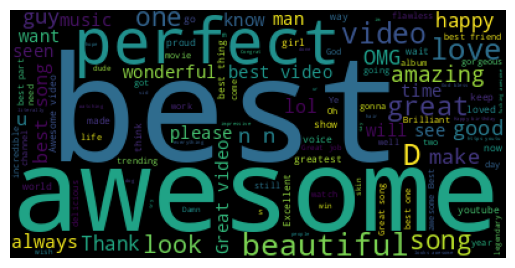

In [13]:
# set stopwords
stopwords = set(STOPWORDS)
# Generate wordcloud but wordcloud only accept string data
# we have to convert them from series into string
wordcloud = WordCloud(stopwords=stopwords).generate(join_positive_comments)
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

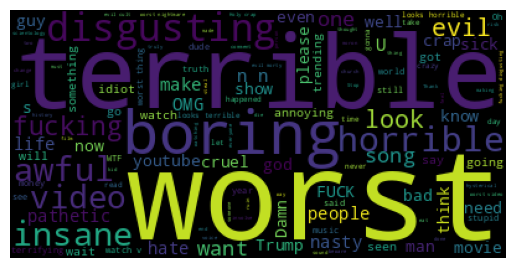

In [14]:
negative_comments = df[df['polarity'] == -1]
join_negative_comments = ' '.join(negative_comments['comment_text'])
negativeWordCloud = WordCloud(stopwords=stopwords).generate(join_negative_comments)
plt.imshow(negativeWordCloud)
plt.axis('off')

### 4. Perform Emoji's Analysis
- install emoji package version 2.2.0 (most stable version)
  > !pip install emoji==2.2.0 (deleted after installed)

In [15]:
!pip install emoji==2.2.0
import emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=8cfef220c1eb21290073ccf4385a104bc0139d8f9d303be324268666038e9804
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [16]:
emoji.__version__

'2.2.0'

In [17]:
# Example of extract emoji from text
comment = 'trending 😉'
[char for char in comment if char in emoji.EMOJI_DATA]
# this is called list comprehensive code

['😉']

In [18]:
emoji_list = []

for comment in df['comment_text'].dropna():
  for char in comment:
    if char in emoji.EMOJI_DATA:
      emoji_list.append(char)

In [19]:
emoji_list[:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [20]:
!pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [21]:
from collections import Counter

In [22]:
mostCommonEmoji = Counter(emoji_list).most_common(10)

In [23]:
emoji = [mostCommonEmoji[i][0] for i in range(10)]
count = [mostCommonEmoji[i][1] for i in range(10)]

In [24]:
import plotly.express as px

In [25]:
fig = px.bar( y=count, x=emoji, text_auto='.2s',
            labels={
                     "x": "Emojis",
                     "y": "Frequencies"
                 },
            title="Most 10 Common Emojis")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red"
)
fig.show()

### 5. Collect Entire Data of Youtube
- Connect to google drive
- List files in folders
- Filter only '.csv' files and stored in allFiles
- Create a blank dataFrame pd.DataFrame()
- Concatenate all files together
- Drop duplicated row

In [26]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
files = !ls 'drive/MyDrive/Colab Notebooks/Dataset'

In [28]:
allFiles = []
for longFile in files:
  file = longFile.split(' ')
  for f in file:
    if len(f) > 4 and '.csv' in f:
      allFiles.append(f.strip())
allFiles

['FRvideos.csv',
 'MXvideos.csv',
 'USvideos.csv',
 'CAvideos.csv',
 'JPvideos.csv',
 'GBvideos.csv',
 'RUvideos.csv',
 'DEvideos.csv',
 'KRvideos.csv',
 'INvideos.csv',
 'UScomments.csv']

In [29]:
fullDf = pd.DataFrame()
path = 'drive/MyDrive/Colab Notebooks/Dataset'

for i in range(len(allFiles) - 1):
  currentDf = pd.read_csv(path + '/' + allFiles[i], encoding = 'iso-8859-1', error_bad_lines=False)
  fullDf = pd.concat([fullDf, currentDf], ignore_index=True)

In [30]:
fullDf.shape

(375942, 16)

In [31]:
df = fullDf.drop_duplicates()
print(df.shape)


(339525, 16)


### 6. Analyze the most liked Category
- Mapp category ID to category name
- Plot the bar chart to see which category has the most views

In [32]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez prÃ©sents pour la vid...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de sociÃ©tÃ©: https://goo.gl/hhG1Ta\n\n...
2,ceqntSXE-10,17.14.11,DESSINS ANIMEÌS FRANCÌ§AIS VS RUSSES 2 - Dani...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokÃ©mon""|""Ã©cole""|""ours""|""Ð¼ÑÐ»ÑÑ...",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animÃ©s franÃ§ais...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,Ã©pisode de Papy Grenier ! Ce mois-ci ..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÃLO SKATE ROLLER...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vÃ©lo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""d...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts Ã plus de 4 mÃ¨tres de haut dans un tra...


In [33]:
json_df = pd.read_json(r'/content/drive/MyDrive/Colab Notebooks/Dataset/US_category_id.json')

In [34]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [35]:
category_dict = {}

for item in json_df['items']:
  key = int(item['id'])
  value = item['snippet']['title']
  category_dict[key] = value

In [36]:
category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [37]:
df['category'] = df['category_id'].map(category_dict)

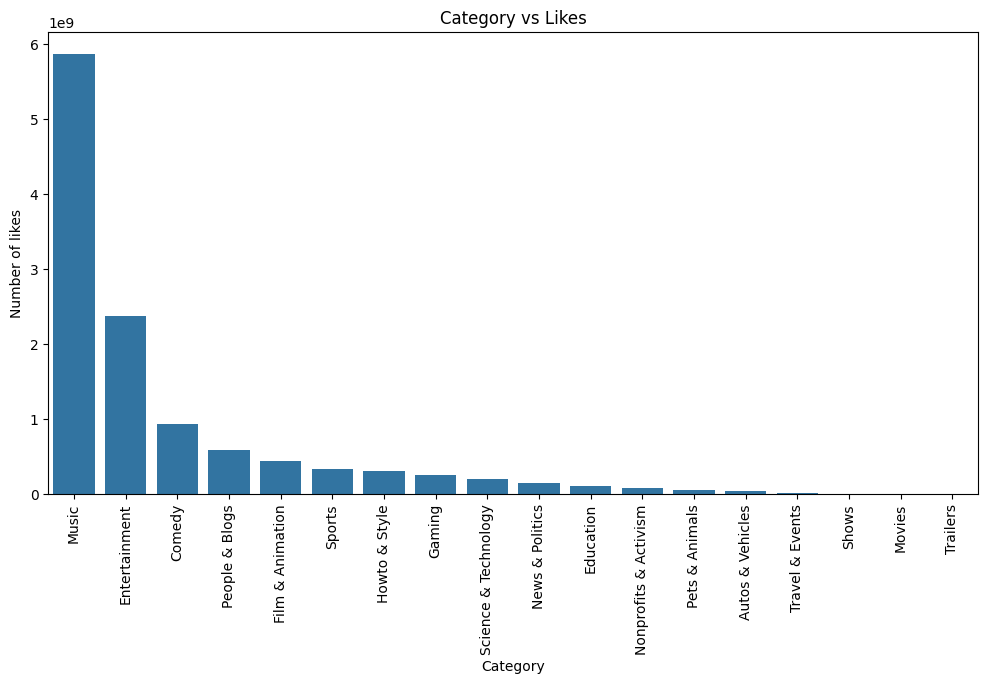

In [38]:
order = df.groupby(['category'])['likes'].sum().sort_values(ascending = False)

plt.figure(figsize=(12,6))
sns.barplot(data=order, order = order.index)
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel('Number of likes')
plt.title('Category vs Likes')
plt.show()

### 7. Analyze whether the audience engage or not
- Rate by likes, dislike, comment counts
- Plot scatterlot to see the relationship between views and likes
> There is a strong relationship at 0.78 for likes and views  
> A strong relationship between dislikes and comment count at 0.75  
> A strong relationship between likes and comment count at 0.76  
- Group by df by 'channel_title' to see how many videos counts each channel
- Using plotly to plot bar chart make it dynamic

In [39]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez prÃ©sents pour la vid...,Entertainment
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de sociÃ©tÃ©: https://goo.gl/hhG1Ta\n\n...,Entertainment


<Axes: >

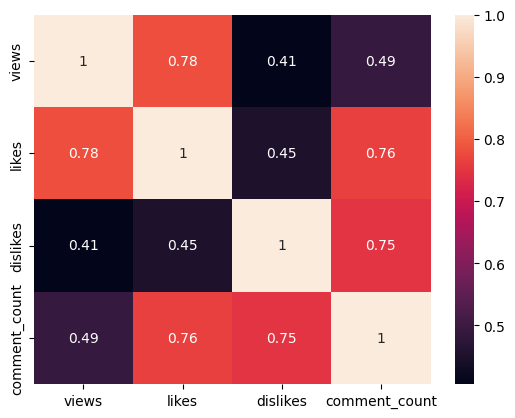

In [40]:
sns.heatmap(df[['views', 'likes', 'dislikes','comment_count']].corr(), annot = True)

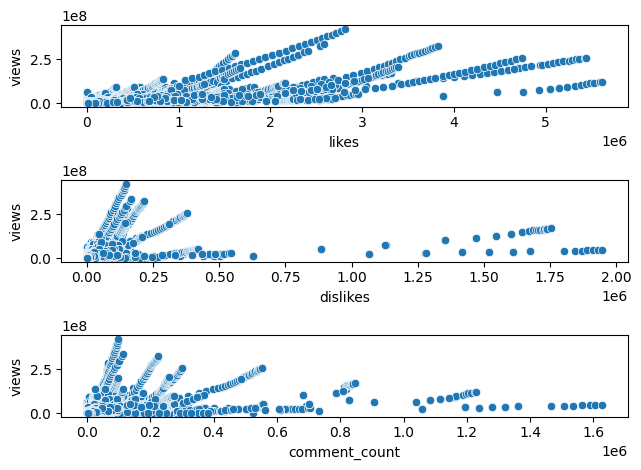

<Figure size 2000x10000 with 0 Axes>

In [41]:
columns = ['likes', 'dislikes', 'comment_count']
fig, ax = plt.subplots(nrows = len(columns))

plt.figure(figsize=(20,100))

for row, ax in zip(columns, ax):
  sns.scatterplot(data = df, x= row, y = 'views', ax = ax)
  ax.set(xlabel=row)

fig.tight_layout()
plt.show()

In [53]:
#Group by channel_title
cdf = df.groupby('channel_title').size().sort_values(ascending = False).reset_index() #reset_index to return a dataFrame
cdf = cdf.rename(columns = {0: 'total_videos'})

In [54]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [55]:
import plotly.express as px

In [58]:
px.bar(data_frame = cdf[:20], x = 'channel_title', y = 'total_videos')

### 8. Does Punctuations in the title and tags have any relations with views / likes / dislikes
- use string.punctuation to define the punctuation
- Define function to apply to all rows in 'title'
- Use sample of 10000 rows instead of whole dataset to maximize the system efficiency

In [60]:
import string

In [84]:
def punc_count(text):
  return len([char for char in text if char in string.punctuation])

In [85]:
sample = df[:10000]
sample['punc_count'] = sample['title'].apply(punc_count)
sample.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,punc_count
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez prÃ©sents pour la vid...,Entertainment,2
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de sociÃ©tÃ©: https://goo.gl/hhG1Ta\n\n...,Entertainment,6
2,ceqntSXE-10,17.14.11,DESSINS ANIMEÌS FRANCÌ§AIS VS RUSSES 2 - Dani...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokÃ©mon""|""Ã©cole""|""ours""|""Ð¼ÑÐ»ÑÑ...",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animÃ©s franÃ§ais...,Comedy,1
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,Ã©pisode de Papy Grenier ! Ce mois-ci ...",Gaming,1
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÃLO SKATE ROLLER...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vÃ©lo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""d...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts Ã plus de 4 mÃ¨tres de haut dans un tra...,Sports,3


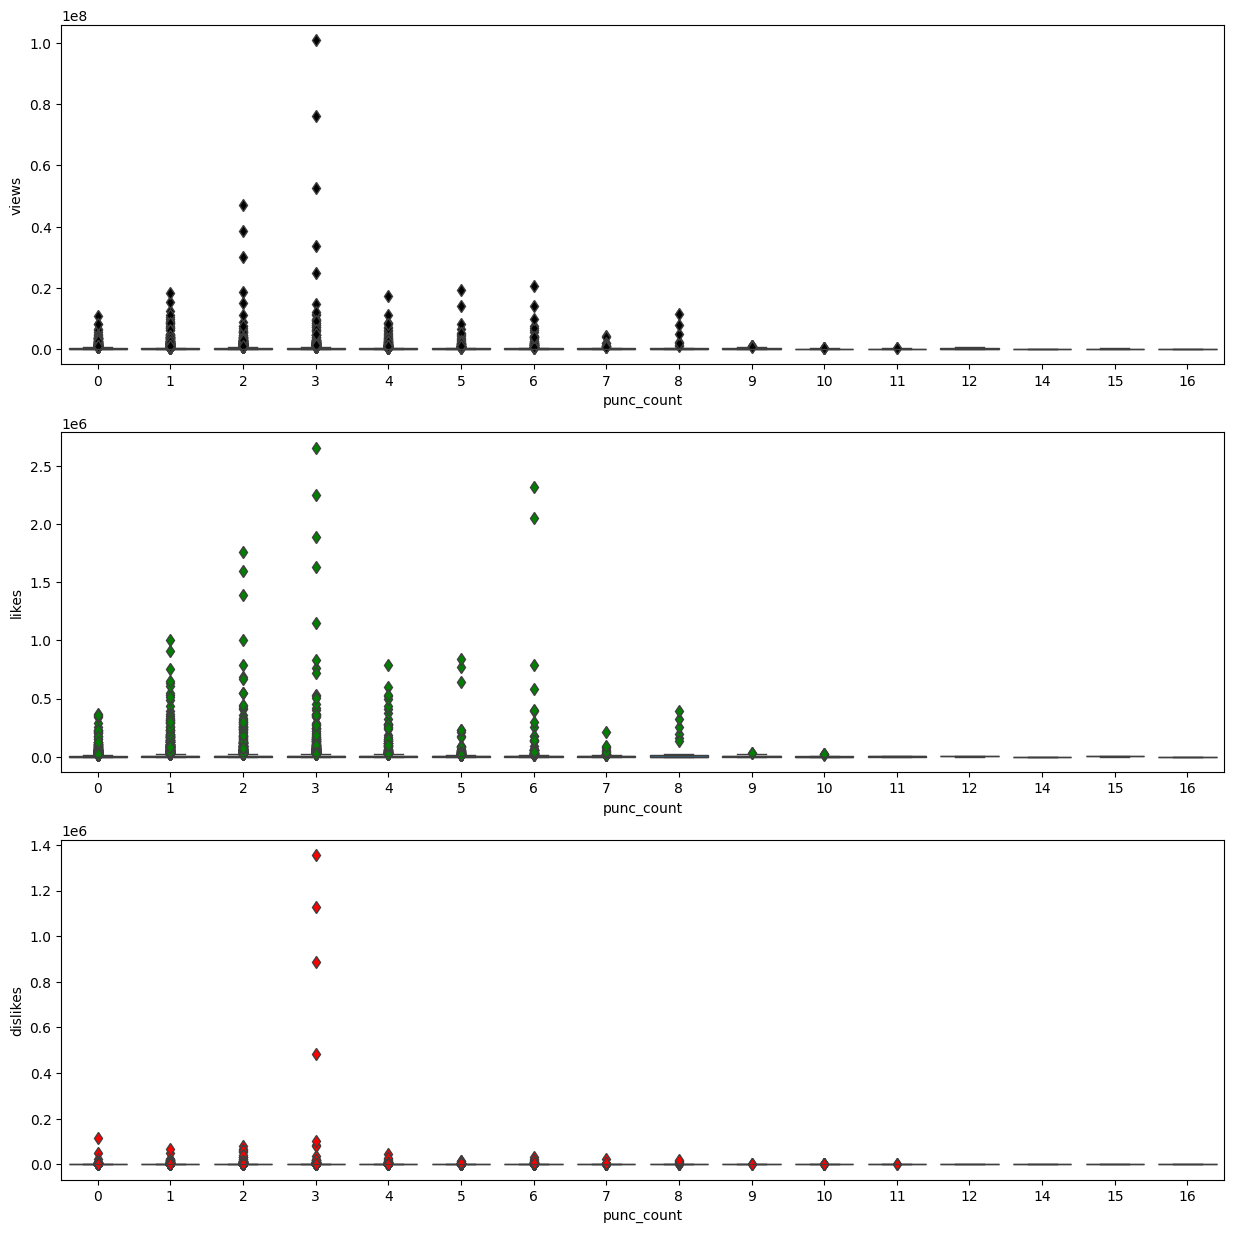

In [117]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_figheight(15)
fig.set_figwidth(15)
sns.boxplot(data = sample, x = 'punc_count', y = 'views', flierprops = dict(marker = "d", markerfacecolor = "black"), ax = ax1)
sns.boxplot(data = sample, x = 'punc_count', y = 'likes', flierprops = dict(marker = "d", markerfacecolor = "green"), ax = ax2)
sns.boxplot(data = sample, x = 'punc_count', y = 'dislikes', flierprops = dict(marker = "d", markerfacecolor = "red"), ax = ax3)
plt.show()